# import necessary libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from  sklearn import tree
import seaborn as sns

In [23]:
fraud_check = pd.read_csv('Fraud_check.csv')

In [24]:
fraud_check['Taxable.Income']= pd.cut(x = fraud_check['Taxable.Income'],bins = [0,30000,100000], labels=['risk','safe'])
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,safe,50047,10,YES
1,YES,Divorced,safe,134075,18,YES
2,NO,Married,safe,160205,30,YES
3,YES,Single,safe,193264,15,YES
4,NO,Married,safe,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,safe,39492,7,YES
596,YES,Divorced,safe,55369,2,YES
597,NO,Divorced,safe,154058,0,YES
598,YES,Married,safe,180083,17,NO


In [25]:
label_encoding = preprocessing.LabelEncoder()
fraud_check['Undergrad'] = label_encoding.fit_transform(fraud_check['Undergrad'])
fraud_check['Marital.Status'] = label_encoding.fit_transform(fraud_check['Marital.Status'])
fraud_check['Urban'] = label_encoding.fit_transform(fraud_check['Urban'])
fraud_check['Taxable.Income'] = label_encoding.fit_transform(fraud_check['Taxable.Income'])

 #### fraud['Undergrad'] is label encoded as YES -> 1 , NO -> 0
 #### fraud_check['Marital.Status'] is label encoded as Divorced ->0 , Married -> 1 ,  Single -> 2
#### fraud_check['Urban'] is label encoded as YES -> 1 , NO -> 0
#### fraud_check['Taxable.Income'] is label encoded as  risk -> 0 safe -> 1
 



In [27]:
fraud_check = fraud_check[['Undergrad', 'Marital.Status', 'City.Population','Work.Experience', 'Urban', 'Taxable.Income']]

In [28]:
# splitting variables
x = fraud_check.iloc[:,0:5]
y = fraud_check.iloc[:,5]


In [29]:
fraud_check['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [8]:
# splitting train and test 

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.3 , random_state = 42)

# Decision tree  using entropy as criterion

In [31]:
model = DecisionTreeClassifier(criterion = 'entropy',splitter = 'best', max_depth= 3, ).fit(x_train, y_train)

[Text(0.4230769230769231, 0.875, 'City.Population <= 60294.5\nentropy = 0.736\nsamples = 420\nvalue = [87, 333]\nclass = safe'),
 Text(0.15384615384615385, 0.625, 'Work.Experience <= 6.5\nentropy = 0.611\nsamples = 93\nvalue = [14, 79]\nclass = safe'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = safe'),
 Text(0.23076923076923078, 0.375, 'Work.Experience <= 24.5\nentropy = 0.679\nsamples = 78\nvalue = [14, 64]\nclass = safe'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.796\nsamples = 54\nvalue = [13, 41]\nclass = safe'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.25\nsamples = 24\nvalue = [1, 23]\nclass = safe'),
 Text(0.6923076923076923, 0.625, 'City.Population <= 64532.5\nentropy = 0.766\nsamples = 327\nvalue = [73, 254]\nclass = safe'),
 Text(0.5384615384615384, 0.375, 'City.Population <= 63521.0\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]\nclass = risk'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [1

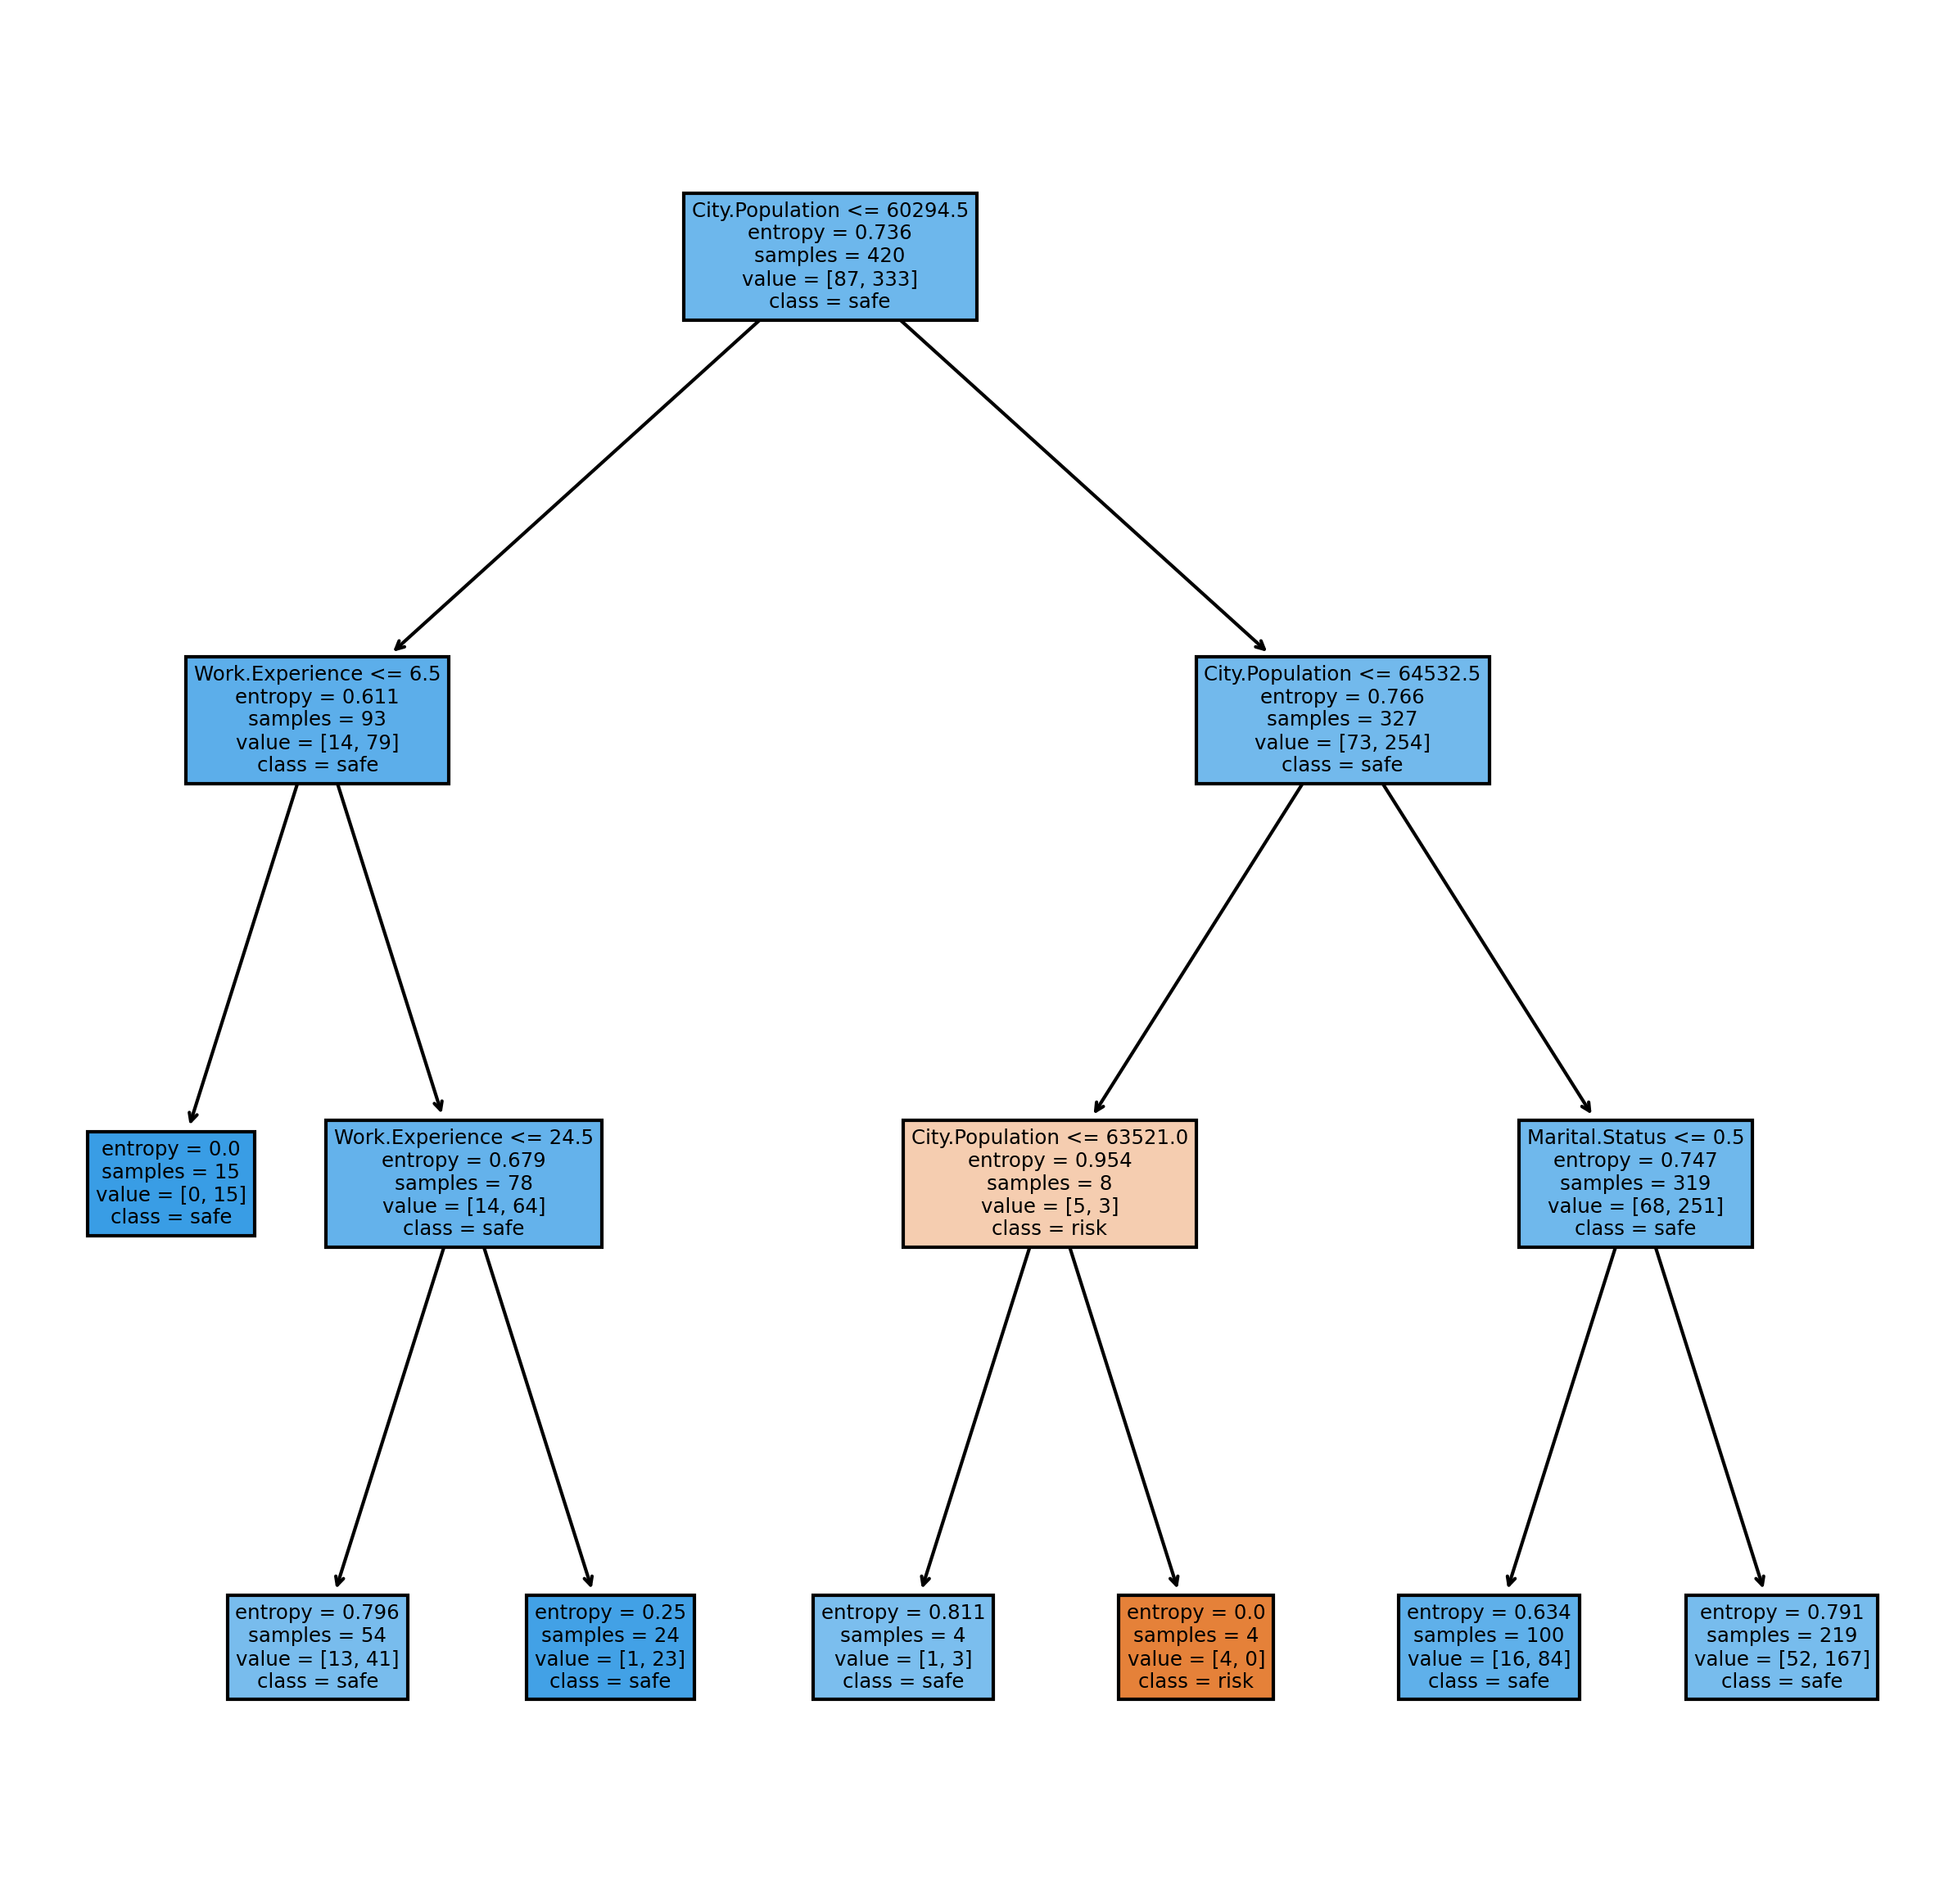

In [32]:
fn = ['Undergrad', 'Marital.Status', 'City.Population','Work.Experience', 'Urban']
cn = ['risk','safe']
plt.subplots(dpi = 300 , figsize =(10,10))
tree.plot_tree(model, feature_names=fn , class_names =cn ,filled = True)

In [33]:
feature_importance = pd.Series(model.feature_importances_ , index = fn).sort_values(ascending = False)
feature_importance

City.Population    0.522029
Work.Experience    0.387083
Marital.Status     0.090888
Undergrad          0.000000
Urban              0.000000
dtype: float64

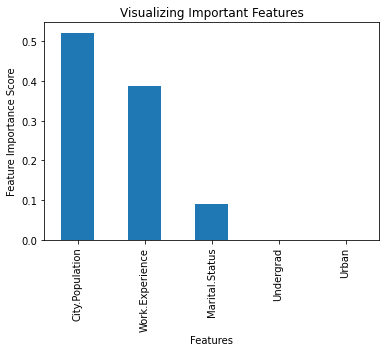

In [34]:
# visualizations 
feature_importance.plot(kind = 'bar')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.show()

In [35]:
# predicting on test data
prediction = (model.predict(x_test))
pd.Series(prediction).value_counts()

1    179
0      1
dtype: int64

In [36]:
# predicting on train data
pre_train = model.predict(x_train)

In [37]:
pd.crosstab(y_test,prediction)
# 37 risk are laelled as safe and 1 safe candidate is misinterpreted as risk category 

col_0,0,1
Taxable.Income,,
0,0,37
1,1,142


In [39]:
# accuracy for the test data 
np.mean(y_test==prediction)

0.7888888888888889

In [40]:
# accuracy of the train data
np.mean(y_train==pre_train)

0.8023809523809524

In [ ]:
# accuracy of train data is pretty much close to the test data 
# so the model created by using entropy as criterion is mostly free from overfitting 

# Decision tree  using ginni index as criterion

In [41]:
model_2 = DecisionTreeClassifier(criterion = 'gini',splitter = 'best', max_depth= 3, ).fit(x_train, y_train)

In [42]:
feature_importance_2 = pd.Series(model_2.feature_importances_,index=fn ).sort_values(ascending=False)
feature_importance_2

City.Population    0.773325
Marital.Status     0.126251
Undergrad          0.100424
Work.Experience    0.000000
Urban              0.000000
dtype: float64

[Text(0.5, 0.875, 'City.Population <= 60294.5\ngini = 0.328\nsamples = 420\nvalue = [87, 333]\nclass = safe'),
 Text(0.25, 0.625, 'Undergrad <= 0.5\ngini = 0.256\nsamples = 93\nvalue = [14, 79]\nclass = safe'),
 Text(0.125, 0.375, 'Marital.Status <= 1.5\ngini = 0.153\nsamples = 48\nvalue = [4, 44]\nclass = safe'),
 Text(0.0625, 0.125, 'gini = 0.213\nsamples = 33\nvalue = [4, 29]\nclass = safe'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = safe'),
 Text(0.375, 0.375, 'City.Population <= 27659.0\ngini = 0.346\nsamples = 45\nvalue = [10, 35]\nclass = safe'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = risk'),
 Text(0.4375, 0.125, 'gini = 0.325\nsamples = 44\nvalue = [9, 35]\nclass = safe'),
 Text(0.75, 0.625, 'City.Population <= 64532.5\ngini = 0.347\nsamples = 327\nvalue = [73, 254]\nclass = safe'),
 Text(0.625, 0.375, 'City.Population <= 63521.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = risk'),
 Text(0.5625, 0.125, 'gini 

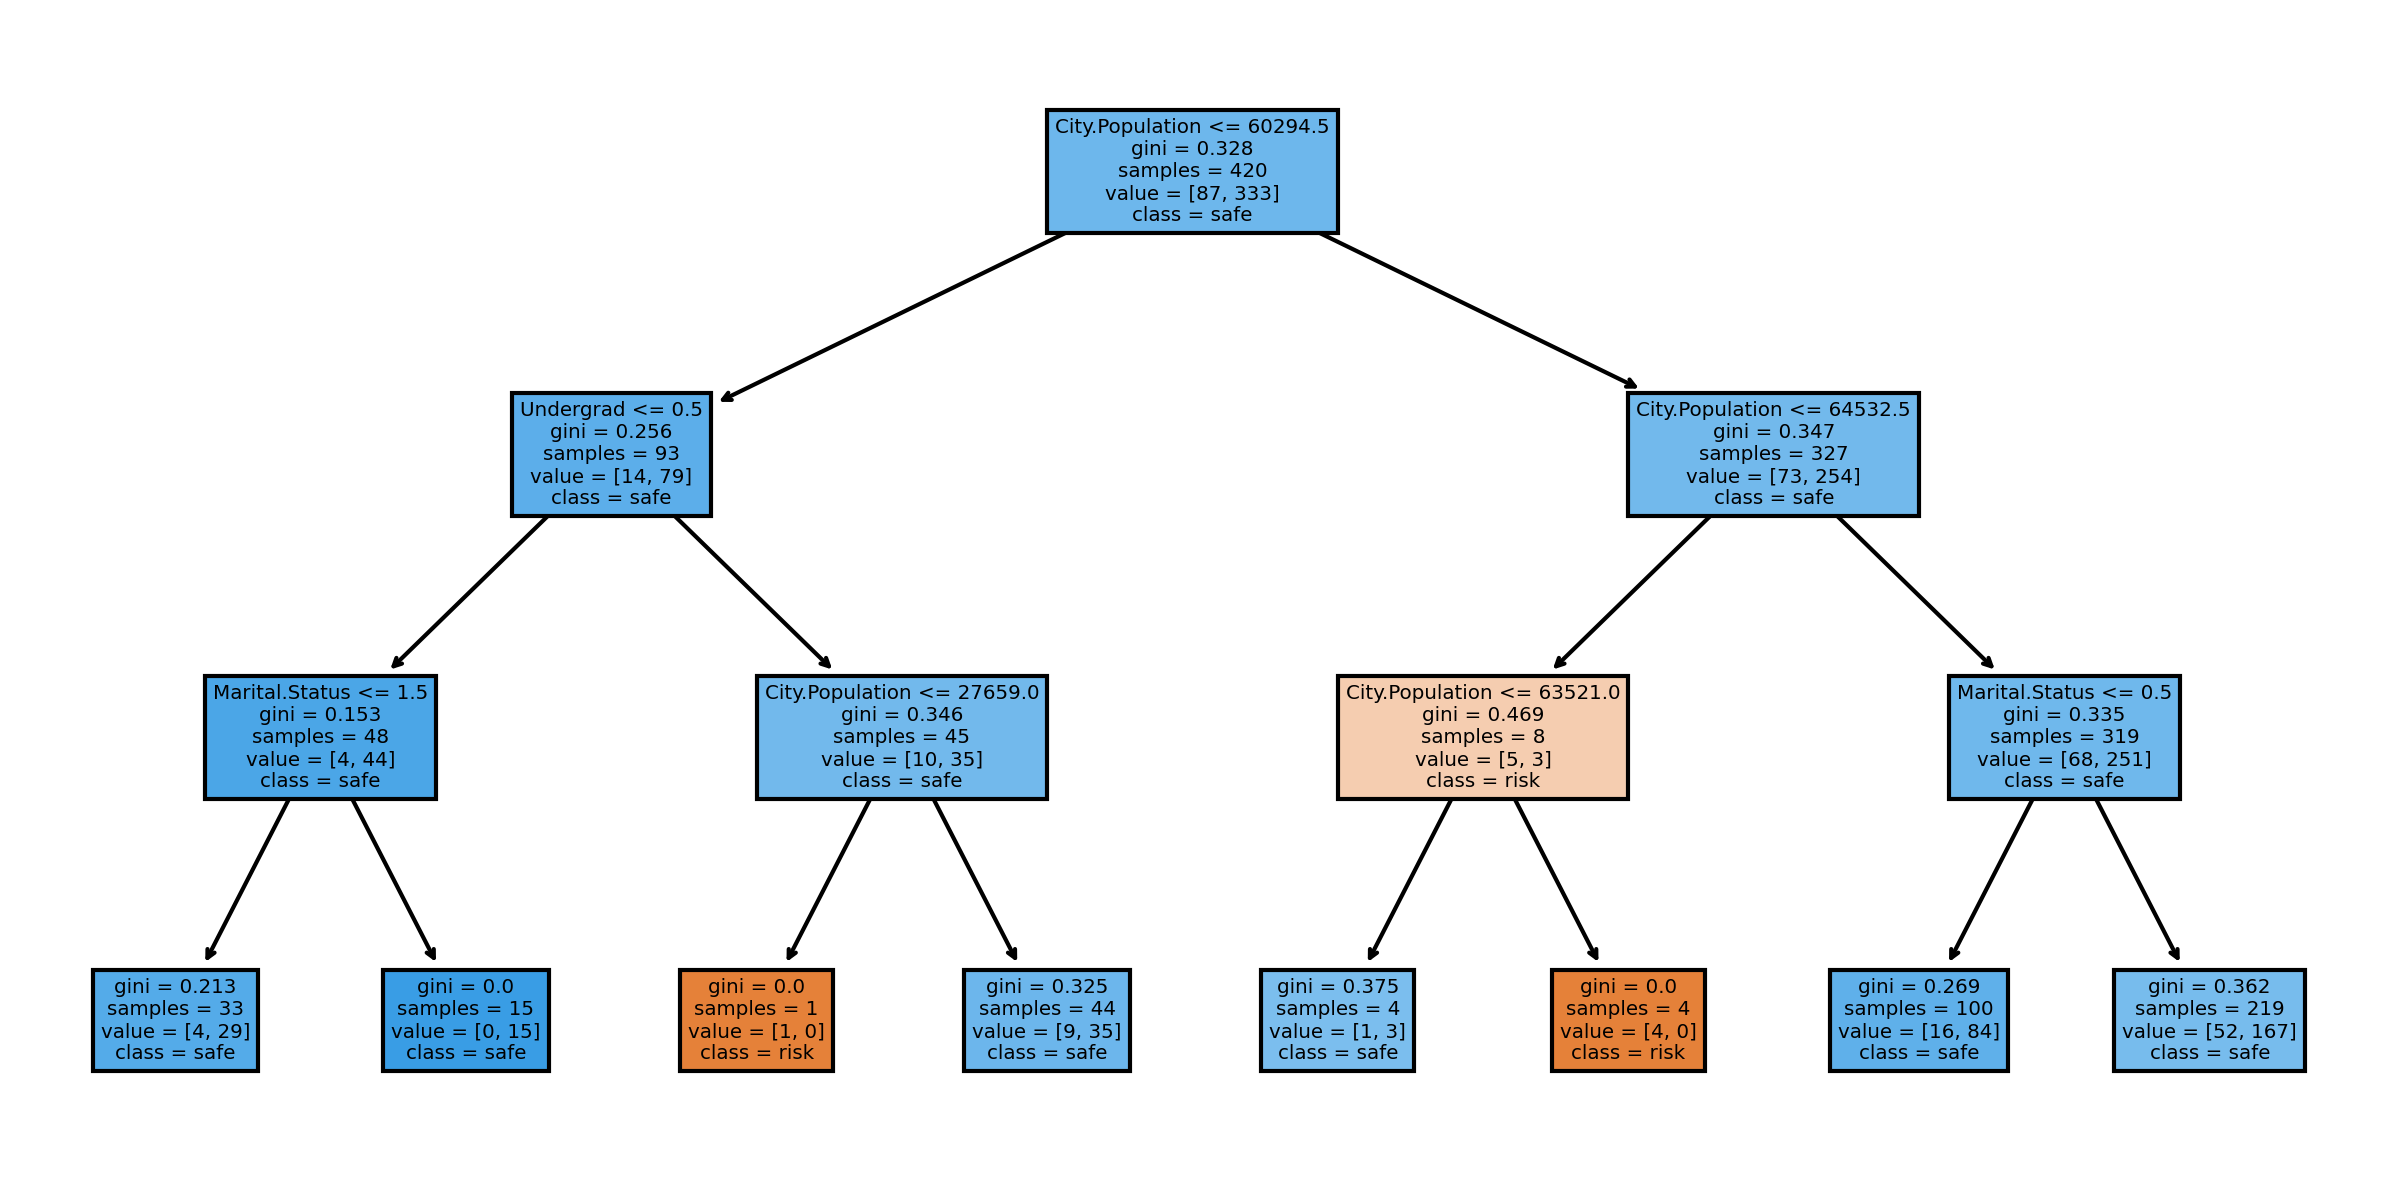

In [43]:
plt.subplots(figsize=(10,5),dpi =300)
tree.plot_tree( model_2,feature_names=fn,class_names=cn,filled=True)

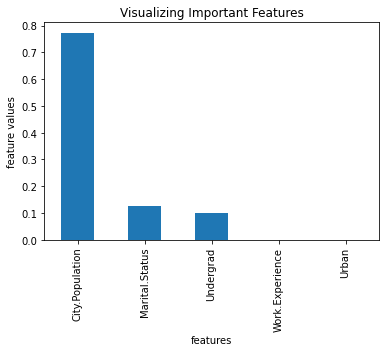

In [44]:
feature_importance_2.plot(kind = 'bar')
plt.xlabel('features')
plt.ylabel('feature values')
plt.title('Visualizing Important Features')
plt.show()

In [ ]:
# prediction for test data

In [45]:
prediction_2 = model_2.predict(x_test)

In [46]:
pd.Series(prediction_2).value_counts()

1    179
0      1
dtype: int64

In [47]:
pd.crosstab(y_test,prediction_2)
# 37 risk are laelled as safe and 1 safe candidate is misinterpreted as risk category 

col_0,0,1
Taxable.Income,,
0,0,37
1,1,142


In [50]:
#accuracy for test data
accuracy_test = np.mean(y_test==prediction_2)
accuracy_test

0.7888888888888889

In [49]:
# prediction for train data 
pre_2 = model_2.predict(x_train)
accuracy_test = pd.Series(pre_2).value_counts()

In [51]:
# accuracy for train data
accuracy_train = np.mean(y_train==pre_2)
accuracy_train

0.8047619047619048

In [ ]:
# accuracy of train data is pretty much close to the test data 
# so the model created by using gini index as criterion is mostly free from overfitting